In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

In [6]:
data = pd.read_csv('data/cleaned_tweets.csv', encoding = 'latin', dtype = str)

In [7]:
data.head(5)

,sentiment,id,date,query,user_id,text,text_cleaned
0,negative,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",aww that is a bummer you shoulda get david car...
1,negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can not update his facebook b...
2,negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,i dive many time for the ball manage to save 5...
3,negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feel itchy and like it on fire
4,negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no it is not behave at all i am mad why am i h...


In [8]:
data['text_cleaned'].sample(5)

1057215    so so sinful i just realize that there really ...
196786     i have a strong urge to eat breakfast and star...
339799           is back 2 see miserable weather i h8 winter
212548     woman sit opposite me is the messy eater in th...
1073370    i can tell your get into this twitter thing ar...
Name: text_cleaned, dtype: object

In [9]:
print(data.shape)
data = data[~data['text_cleaned'].isna()]
print(data.shape)

(1600000, 7)
(1596818, 7)


# Eda

In [7]:
data.head(2)

,sentiment,id,date,query,user_id,text,text_cleaned
0,negative,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",aww that is a bummer you shoulda get david car...
1,negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can not update his facebook b...


In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [34]:
data[['id', 'sentiment', 'text']].sample(5)

,id,sentiment,text
963688,1827461707,positive,@nauticathorn http://twitpic.com/5d7gy - Bang! Bang! Bang! Giddy-Giddy!
240617,1980916125,negative,eww. jus had the worse dream ever
897658,1693405239,positive,http://tinyurl.com/d49u5q &lt; THE MOST AMAZING collab that I happen to be in.
787471,2324905275,negative,i cannot wait for a @Theghostof1000 show! i can only make one date on the july tour
1013191,1881293346,positive,got back from rehearsals... recording in two weeks can't wait ^^


In [26]:
print(data['sentiment'].value_counts())

sentiment
positive    798428
negative    798390
Name: count, dtype: int64


In [1]:
800000 - 798428

1572

In [2]:
800000 - 798390

1610

In [4]:
1610 +1572

3182

## Value Count

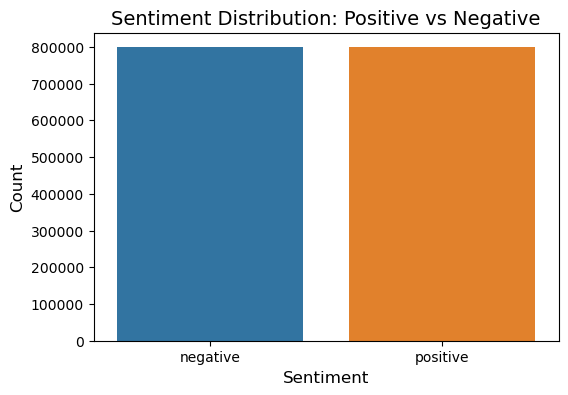

In [22]:
plt.figure(figsize=(6, 4))

sns.countplot(x='sentiment', data=data, hue = 'sentiment')

plt.title('Sentiment Distribution: Positive vs Negative', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

## Wordcloud

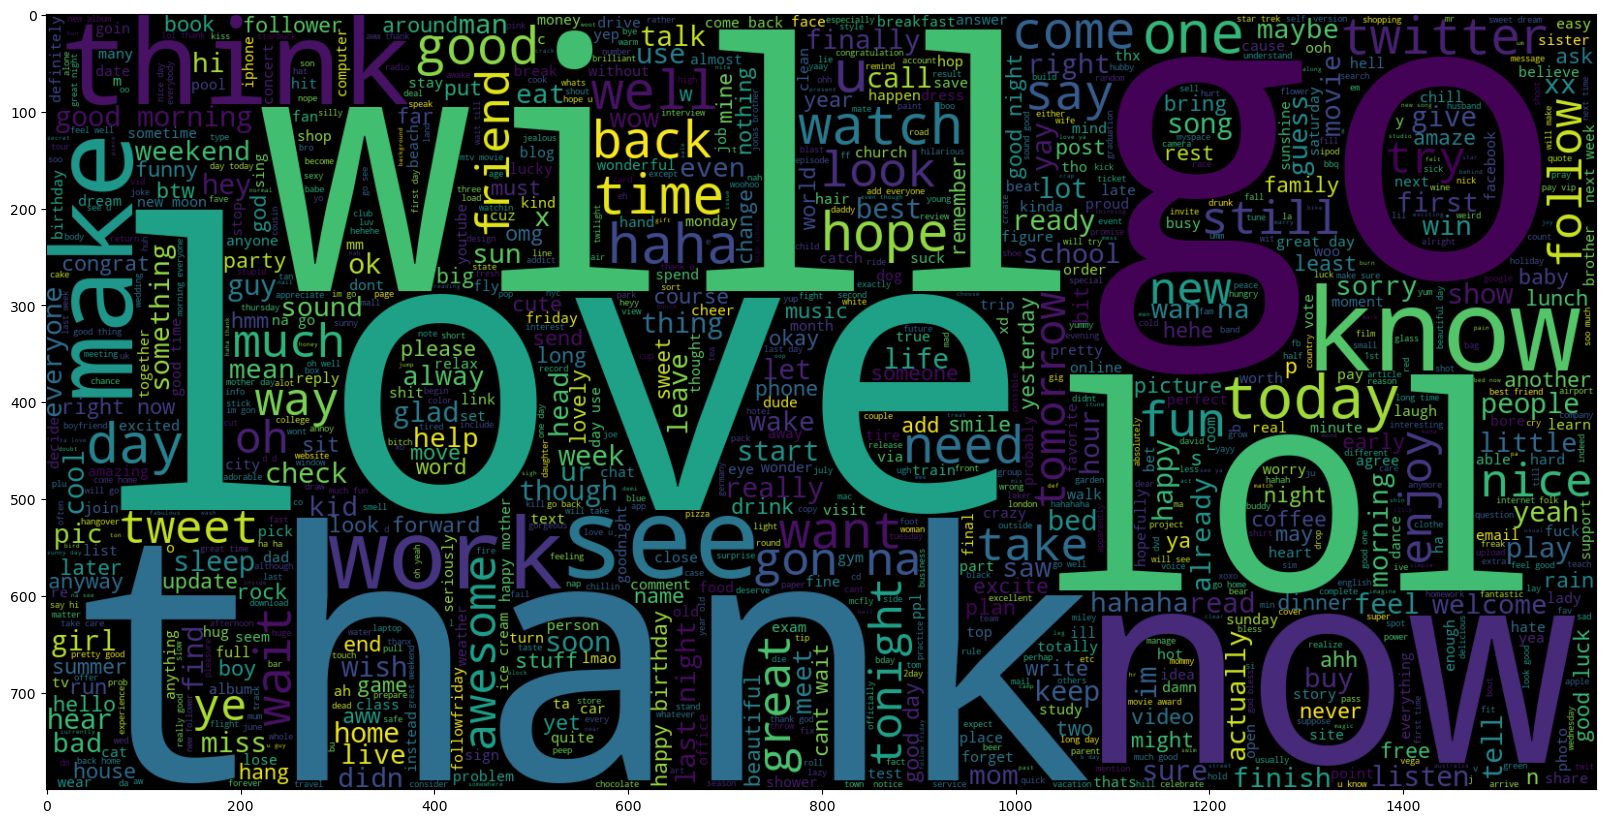

In [23]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(data[data.sentiment == 'positive'].text_cleaned))
plt.imshow(wc , interpolation = 'bilinear')

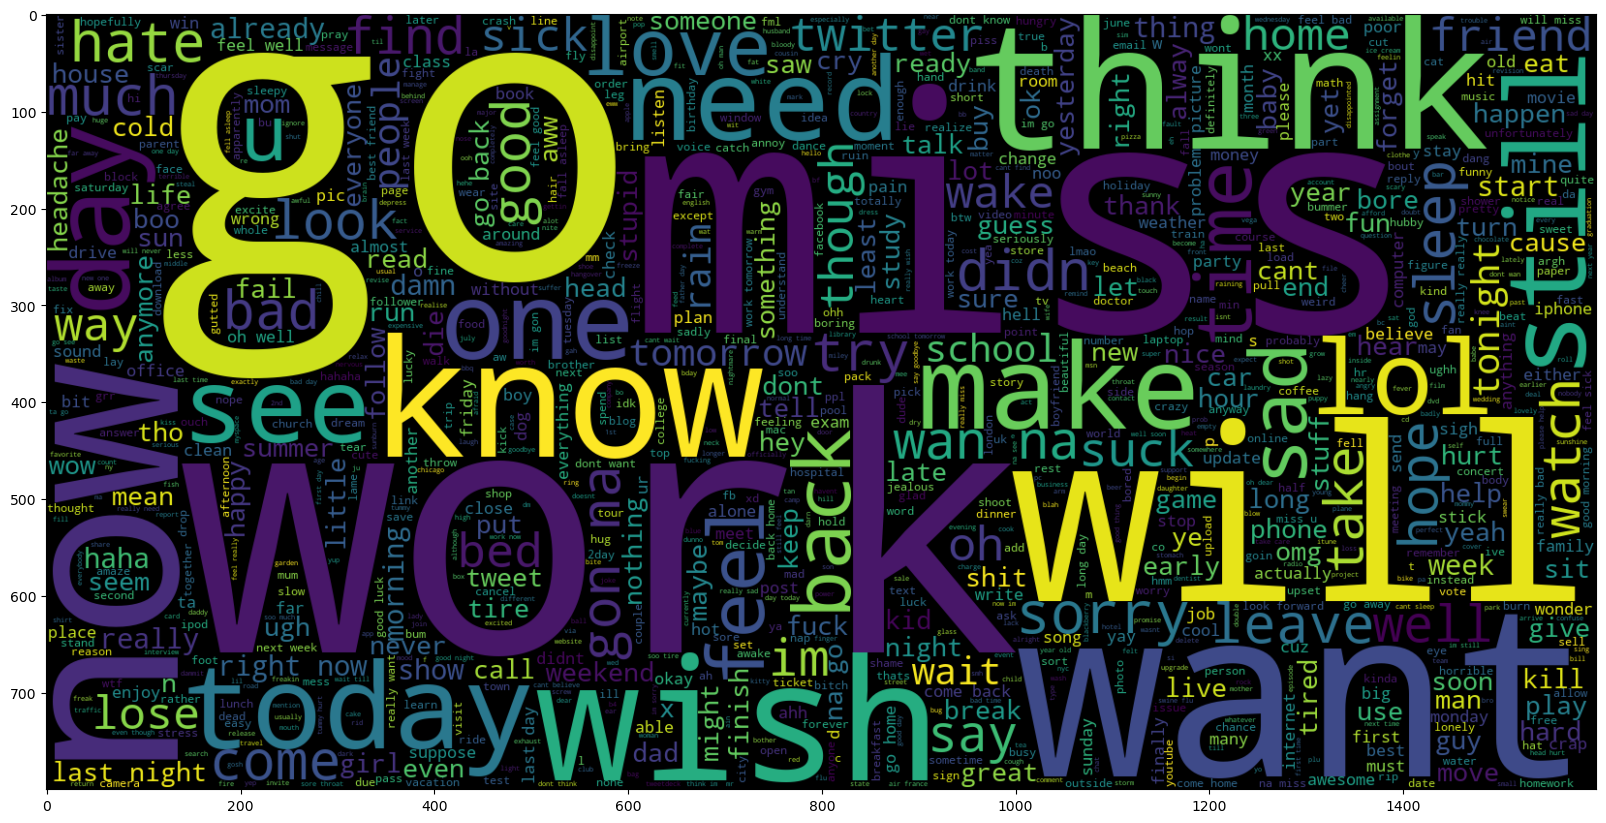

In [24]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(data[data.sentiment == 'negative'].text_cleaned))
plt.imshow(wc , interpolation = 'bilinear')